In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
from mplsoccer import PyPizza, add_image, FontManager
import math
from PIL import Image
import imageio

In [307]:
#Read in CSV file

df = pd.read_csv('FbrefSB2122.csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [308]:
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,npGoals,npxG+xA,Goals,Shots,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,AvgShotDistance,FKShots,PK,PKsAtt,xG,npxG,npxG/Sh,G-xG,npG-xG,PassesCompleted,PassesAttempted,TotCmp%,TotalPassDist,ProgPassDist,ShortPassCmp,ShortPassAtt,ShortPassCmp%,MedPassCmp,MedPassAtt,MedPassCmp%,LongPassCmp,LongPassAtt,LongPassCmp%,Assists,xA,A-xA,KeyPasses,Final1/3Cmp,PenAreaCmp,CrsPenAreaCmp,ProgPasses,LivePass,DeadPass,FKPasses,ThruBalls,PassUnderPress,Switches,Crs,CK,InSwingCK,OutSwingCK,StrCK,Ground,Low,High,Left,Right,Head,ThrowIn,Other,PassesToOff,PassesOOB,PassesInt,PassesBlocked,SCA,SCA90,SCAPassLive,SCAPassDead,SCADrib,SCASh,SCAFld,SCADef,GCA,GCA90,GCAPassLive,GCAPassDead,GCADrib,GCASh,GCAFld,GCADef,DrbTkl,TklWinPoss,Def3rdPress,Mid3rdPress,Att3rdPress,DrbTkl.1,DrpPastAtt,DrbTkl%,DrbPast,Press,PressSucc,PressSucc%,Def3rdPress.1,Mid3rdPress.1,Att3rdPress.1,Blocks,ShBlocks,ShSvBlocks,PassBlocks,Int,Tkl+Int,Clr,Err,Touches,DefPenTouch,Def3rdTouch,Mid3rdTouch,Att3rdTouch,AttPenTouch,LiveTouch,SuccDrb,AttDrb,DrbSucc%,PlDrbPast,Megs,Carries,TotCarryDist,PrgCarryDist,ProgCarries,CarriesToFinal3rd,CarriesToPenArea,CarryMistakes,Disposesed,PassTarget,ReceivedPass,Receive%,ProgPassesRec,Yellows,Reds,Yellow2,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerialWins,AerialLoss,AerialWin%,npGoalsPer90,npxG+xAPer90,GoalsPer90,ShotsPer90,SoTPer90,SoT%Per90,Sh/90Per90,SoT/90Per90,G/ShPer90,G/SoTPer90,AvgShotDistancePer90,FKShotsPer90,PKPer90,PKsAttPer90,xGPer90,npxGPer90,npxG/ShPer90,G-xGPer90,npG-xGPer90,PassesCompletedPer90,PassesAttemptedPer90,TotCmp%Per90,TotalPassDistPer90,ProgPassDistPer90,ShortPassCmpPer90,ShortPassAttPer90,ShortPassCmp%Per90,MedPassCmpPer90,MedPassAttPer90,MedPassCmp%Per90,LongPassCmpPer90,LongPassAttPer90,LongPassCmp%Per90,AssistsPer90,xAPer90,A-xAPer90,KeyPassesPer90,Final1/3CmpPer90,PenAreaCmpPer90,CrsPenAreaCmpPer90,ProgPassesPer90,LivePassPer90,DeadPassPer90,FKPassesPer90,ThruBallsPer90,PassUnderPressPer90,SwitchesPer90,CrsPer90,CKPer90,InSwingCKPer90,OutSwingCKPer90,StrCKPer90,GroundPer90,LowPer90,HighPer90,LeftPer90,RightPer90,HeadPer90,ThrowInPer90,OtherPer90,PassesToOffPer90,PassesOOBPer90,PassesIntPer90,PassesBlockedPer90,SCAPer90,SCA90Per90,GCAPassLivePer90,GCAPassDeadPer90,GCADribPer90,GCAShPer90,GCAFldPer90,GCADefPer90,GCAPer90,GCA90Per90,GCAPassLive.1Per90,GCAPassDead.1Per90,GCADrib.1Per90,GCASh.1Per90,GCAFld.1Per90,GCADef.1Per90,DrbTklPer90,TklWinPossPer90,Def3rdPressPer90,Mid3rdPressPer90,Att3rdPressPer90,DrbTkl.1Per90,DrpPastAttPer90,DrbTkl%Per90,DrbPastPer90,PressPer90,PressSuccPer90,PressSucc%Per90,Def3rdPress.1Per90,Mid3rdPress.1Per90,Att3rdPress.1Per90,BlocksPer90,ShBlocksPer90,ShSvBlocksPer90,PassBlocksPer90,IntPer90,Tkl+IntPer90,ClrPer90,ErrPer90,TouchesPer90,DefPenTouchPer90,Def3rdTouchPer90,Mid3rdTouchPer90,Att3rdTouchPer90,AttPenTouchPer90,LiveTouchPer90,SuccDrbPer90,AttDrbPer90,DrbSucc%Per90,PlDrbPastPer90,MegsPer90,CarriesPer90,TotCarryDistPer90,PrgCarryDistPer90,ProgCarriesPer90,CarriesToFinal3rdPer90,CarriesToPenAreaPer90,CarryMistakesPer90,DisposesedPer90,PassTargetPer90,ReceivedPassPer90,Receive%Per90,ProgPassesRecPer90,YellowsPer90,RedsPer90,Yellow2Per90,FlsPer90,FldPer90,OffPer90,PKwonPer90,PKconPer90,OGPer90,RecovPer90,AerialWinsPer90,AerialLossPer90,AerialWin%Per90,90sPer90,AvgTeamPoss,OppTouches,TeamMins,TeamTouches90,pAdjTkl+IntPer90,pAdjPressSuccPer90,pAdjClrPer90,pAdjShBlocksPer90,pAdjIntPer90,pAdjDrbTklPer90,pAdjTklWinPossPer90,pAdjDrbPastPer90,pAdjAerialWinsPer90,pAdjAerialLossPer90,pAdjDrpPastAttPer90,TouchCentrality,Tkl+IntOppTouch,pAdjTouchesPer90,pAdjCarriesPer90,Main Position
0,William Saliba,fr FRA,DF,Marseille,fr Ligue 1,20,2001,36,36,3240,0,2.4,0,16,3,18.8,0.44,0.08,0.00,0.00,10.3,0,0,0,1.5,1.5,0.10,-1.5,-1.5,2865,3058,93.7,56752,16714,925,977,94.7,1575,1631,96.6,349,408,85.5,0,0.8,-0.8,6,184,15,2,166,2965,93,71,2,294,48,6,0,0,0,0,2740,152,166,141,2806,48,21,6,2,23,45,24,21,0.58,19,0,0,2,0,0,3,0.08,2,0,0,1,0,0,65,42,47,15,3,15,32,46.9,17,297,139,46.8,16

In [309]:
#Filter the dataframe by age and minutes played - 26 and younger, and 750 mins played

df = df.loc[(df['Age']<27) & (df['Min']>750) & (df['Main Position']=='Centre-Back')]


In [310]:
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,npGoals,npxG+xA,Goals,Shots,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,AvgShotDistance,FKShots,PK,PKsAtt,xG,npxG,npxG/Sh,G-xG,npG-xG,PassesCompleted,PassesAttempted,TotCmp%,TotalPassDist,ProgPassDist,ShortPassCmp,ShortPassAtt,ShortPassCmp%,MedPassCmp,MedPassAtt,MedPassCmp%,LongPassCmp,LongPassAtt,LongPassCmp%,Assists,xA,A-xA,KeyPasses,Final1/3Cmp,PenAreaCmp,CrsPenAreaCmp,ProgPasses,LivePass,DeadPass,FKPasses,ThruBalls,PassUnderPress,Switches,Crs,CK,InSwingCK,OutSwingCK,StrCK,Ground,Low,High,Left,Right,Head,ThrowIn,Other,PassesToOff,PassesOOB,PassesInt,PassesBlocked,SCA,SCA90,SCAPassLive,SCAPassDead,SCADrib,SCASh,SCAFld,SCADef,GCA,GCA90,GCAPassLive,GCAPassDead,GCADrib,GCASh,GCAFld,GCADef,DrbTkl,TklWinPoss,Def3rdPress,Mid3rdPress,Att3rdPress,DrbTkl.1,DrpPastAtt,DrbTkl%,DrbPast,Press,PressSucc,PressSucc%,Def3rdPress.1,Mid3rdPress.1,Att3rdPress.1,Blocks,ShBlocks,ShSvBlocks,PassBlocks,Int,Tkl+Int,Clr,Err,Touches,DefPenTouch,Def3rdTouch,Mid3rdTouch,Att3rdTouch,AttPenTouch,LiveTouch,SuccDrb,AttDrb,DrbSucc%,PlDrbPast,Megs,Carries,TotCarryDist,PrgCarryDist,ProgCarries,CarriesToFinal3rd,CarriesToPenArea,CarryMistakes,Disposesed,PassTarget,ReceivedPass,Receive%,ProgPassesRec,Yellows,Reds,Yellow2,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerialWins,AerialLoss,AerialWin%,npGoalsPer90,npxG+xAPer90,GoalsPer90,ShotsPer90,SoTPer90,SoT%Per90,Sh/90Per90,SoT/90Per90,G/ShPer90,G/SoTPer90,AvgShotDistancePer90,FKShotsPer90,PKPer90,PKsAttPer90,xGPer90,npxGPer90,npxG/ShPer90,G-xGPer90,npG-xGPer90,PassesCompletedPer90,PassesAttemptedPer90,TotCmp%Per90,TotalPassDistPer90,ProgPassDistPer90,ShortPassCmpPer90,ShortPassAttPer90,ShortPassCmp%Per90,MedPassCmpPer90,MedPassAttPer90,MedPassCmp%Per90,LongPassCmpPer90,LongPassAttPer90,LongPassCmp%Per90,AssistsPer90,xAPer90,A-xAPer90,KeyPassesPer90,Final1/3CmpPer90,PenAreaCmpPer90,CrsPenAreaCmpPer90,ProgPassesPer90,LivePassPer90,DeadPassPer90,FKPassesPer90,ThruBallsPer90,PassUnderPressPer90,SwitchesPer90,CrsPer90,CKPer90,InSwingCKPer90,OutSwingCKPer90,StrCKPer90,GroundPer90,LowPer90,HighPer90,LeftPer90,RightPer90,HeadPer90,ThrowInPer90,OtherPer90,PassesToOffPer90,PassesOOBPer90,PassesIntPer90,PassesBlockedPer90,SCAPer90,SCA90Per90,GCAPassLivePer90,GCAPassDeadPer90,GCADribPer90,GCAShPer90,GCAFldPer90,GCADefPer90,GCAPer90,GCA90Per90,GCAPassLive.1Per90,GCAPassDead.1Per90,GCADrib.1Per90,GCASh.1Per90,GCAFld.1Per90,GCADef.1Per90,DrbTklPer90,TklWinPossPer90,Def3rdPressPer90,Mid3rdPressPer90,Att3rdPressPer90,DrbTkl.1Per90,DrpPastAttPer90,DrbTkl%Per90,DrbPastPer90,PressPer90,PressSuccPer90,PressSucc%Per90,Def3rdPress.1Per90,Mid3rdPress.1Per90,Att3rdPress.1Per90,BlocksPer90,ShBlocksPer90,ShSvBlocksPer90,PassBlocksPer90,IntPer90,Tkl+IntPer90,ClrPer90,ErrPer90,TouchesPer90,DefPenTouchPer90,Def3rdTouchPer90,Mid3rdTouchPer90,Att3rdTouchPer90,AttPenTouchPer90,LiveTouchPer90,SuccDrbPer90,AttDrbPer90,DrbSucc%Per90,PlDrbPastPer90,MegsPer90,CarriesPer90,TotCarryDistPer90,PrgCarryDistPer90,ProgCarriesPer90,CarriesToFinal3rdPer90,CarriesToPenAreaPer90,CarryMistakesPer90,DisposesedPer90,PassTargetPer90,ReceivedPassPer90,Receive%Per90,ProgPassesRecPer90,YellowsPer90,RedsPer90,Yellow2Per90,FlsPer90,FldPer90,OffPer90,PKwonPer90,PKconPer90,OGPer90,RecovPer90,AerialWinsPer90,AerialLossPer90,AerialWin%Per90,90sPer90,AvgTeamPoss,OppTouches,TeamMins,TeamTouches90,pAdjTkl+IntPer90,pAdjPressSuccPer90,pAdjClrPer90,pAdjShBlocksPer90,pAdjIntPer90,pAdjDrbTklPer90,pAdjTklWinPossPer90,pAdjDrbPastPer90,pAdjAerialWinsPer90,pAdjAerialLossPer90,pAdjDrpPastAttPer90,TouchCentrality,Tkl+IntOppTouch,pAdjTouchesPer90,pAdjCarriesPer90,Main Position
0,William Saliba,fr FRA,DF,Marseille,fr Ligue 1,20,2001,36,36,3240,0,2.4,0,16,3,18.8,0.44,0.08,0.00,0.00,10.3,0,0,0,1.5,1.5,0.10,-1.5,-1.5,2865,3058,93.7,56752,16714,925,977,94.7,1575,1631,96.6,349,408,85.5,0,0.8,-0.8,6,184,15,2,166,2965,93,71,2,294,48,6,0,0,0,0,2740,152,166,141,2806,48,21,6,2,23,45,24,21,0.58,19,0,0,2,0,0,3,0.08,2,0,0,1,0,0,65,42,47,15,3,15,32,46.9,17,297,139,46.8,16

In [311]:
#Seperating dataframe for player key information

df1 = df.filter(['Player','Squad','Main Position','Comp','Mins','Age'], axis=1)


In [312]:
#Convert all numeric values to Z-Scores
numeric_cols = df.select_dtypes(include=[np.number]).columns

df2 = df[numeric_cols].apply(zscore)

In [313]:
df2.head()

,Age,Born,MP,Starts,Min,npGoals,npxG+xA,Goals,Shots,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,AvgShotDistance,FKShots,PK,PKsAtt,xG,npxG,npxG/Sh,G-xG,npG-xG,PassesCompleted,PassesAttempted,TotCmp%,TotalPassDist,ProgPassDist,ShortPassCmp,ShortPassAtt,ShortPassCmp%,MedPassCmp,MedPassAtt,MedPassCmp%,LongPassCmp,LongPassAtt,LongPassCmp%,Assists,xA,A-xA,KeyPasses,Final1/3Cmp,PenAreaCmp,CrsPenAreaCmp,ProgPasses,LivePass,DeadPass,FKPasses,ThruBalls,PassUnderPress,Switches,Crs,CK,InSwingCK,OutSwingCK,StrCK,Ground,Low,High,Left,Right,Head,ThrowIn,Other,PassesToOff,PassesOOB,PassesInt,PassesBlocked,SCA,SCA90,SCAPassLive,SCAPassDead,SCADrib,SCASh,SCAFld,SCADef,GCA,GCA90,GCAPassLive,GCAPassDead,GCADrib,GCASh,GCAFld,GCADef,DrbTkl,TklWinPoss,Def3rdPress,Mid3rdPress,Att3rdPress,DrbTkl.1,DrpPastAtt,DrbTkl%,DrbPast,Press,PressSucc,PressSucc%,Def3rdPress.1,Mid3rdPress.1,Att3rdPress.1,Blocks,ShBlocks,ShSvBlocks,PassBlocks,Int,Tkl+Int,Clr,Err,Touches,DefPenTouch,Def3rdTouch,Mid3rdTouch,Att3rdTouch,AttPenTouch,LiveTouch,SuccDrb,AttDrb,DrbSucc%,PlDrbPast,Megs,Carries,TotCarryDist,PrgCarryDist,ProgCarries,CarriesToFinal3rd,CarriesToPenArea,CarryMistakes,Disposesed,PassTarget,ReceivedPass,Receive%,ProgPassesRec,Yellows,Reds,Yellow2,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerialWins,AerialLoss,AerialWin%,npGoalsPer90,npxG+xAPer90,GoalsPer90,ShotsPer90,SoTPer90,SoT%Per90,Sh/90Per90,SoT/90Per90,G/ShPer90,G/SoTPer90,AvgShotDistancePer90,FKShotsPer90,PKPer90,PKsAttPer90,xGPer90,npxGPer90,npxG/ShPer90,G-xGPer90,npG-xGPer90,PassesCompletedPer90,PassesAttemptedPer90,TotCmp%Per90,TotalPassDistPer90,ProgPassDistPer90,ShortPassCmpPer90,ShortPassAttPer90,ShortPassCmp%Per90,MedPassCmpPer90,MedPassAttPer90,MedPassCmp%Per90,LongPassCmpPer90,LongPassAttPer90,LongPassCmp%Per90,AssistsPer90,xAPer90,A-xAPer90,KeyPassesPer90,Final1/3CmpPer90,PenAreaCmpPer90,CrsPenAreaCmpPer90,ProgPassesPer90,LivePassPer90,DeadPassPer90,FKPassesPer90,ThruBallsPer90,PassUnderPressPer90,SwitchesPer90,CrsPer90,CKPer90,InSwingCKPer90,OutSwingCKPer90,StrCKPer90,GroundPer90,LowPer90,HighPer90,LeftPer90,RightPer90,HeadPer90,ThrowInPer90,OtherPer90,PassesToOffPer90,PassesOOBPer90,PassesIntPer90,PassesBlockedPer90,SCAPer90,SCA90Per90,GCAPassLivePer90,GCAPassDeadPer90,GCADribPer90,GCAShPer90,GCAFldPer90,GCADefPer90,GCAPer90,GCA90Per90,GCAPassLive.1Per90,GCAPassDead.1Per90,GCADrib.1Per90,GCASh.1Per90,GCAFld.1Per90,GCADef.1Per90,DrbTklPer90,TklWinPossPer90,Def3rdPressPer90,Mid3rdPressPer90,Att3rdPressPer90,DrbTkl.1Per90,DrpPastAttPer90,DrbTkl%Per90,DrbPastPer90,PressPer90,PressSuccPer90,PressSucc%Per90,Def3rdPress.1Per90,Mid3rdPress.1Per90,Att3rdPress.1Per90,BlocksPer90,ShBlocksPer90,ShSvBlocksPer90,PassBlocksPer90,IntPer90,Tkl+IntPer90,ClrPer90,ErrPer90,TouchesPer90,DefPenTouchPer90,Def3rdTouchPer90,Mid3rdTouchPer90,Att3rdTouchPer90,AttPenTouchPer90,LiveTouchPer90,SuccDrbPer90,AttDrbPer90,DrbSucc%Per90,PlDrbPastPer90,MegsPer90,CarriesPer90,TotCarryDistPer90,PrgCarryDistPer90,ProgCarriesPer90,CarriesToFinal3rdPer90,CarriesToPenAreaPer90,CarryMistakesPer90,DisposesedPer90,PassTargetPer90,ReceivedPassPer90,Receive%Per90,ProgPassesRecPer90,YellowsPer90,RedsPer90,Yellow2Per90,FlsPer90,FldPer90,OffPer90,PKwonPer90,PKconPer90,OGPer90,RecovPer90,AerialWinsPer90,AerialLossPer90,AerialWin%Per90,90sPer90,AvgTeamPoss,OppTouches,TeamMins,TeamTouches90,pAdjTkl+IntPer90,pAdjPressSuccPer90,pAdjClrPer90,pAdjShBlocksPer90,pAdjIntPer90,pAdjDrbTklPer90,pAdjTklWinPossPer90,pAdjDrbPastPer90,pAdjAerialWinsPer90,pAdjAerialLossPer90,pAdjDrpPastAttPer90,TouchCentrality,Tkl+IntOppTouch,pAdjTouchesPer90,pAdjCarriesPer90
0,-1.438114,1.566817,1.589035,1.694611,1.786744,-0.845654,0.882619,-0.841736,0.677599,-0.046409,-0.435848,-0.248492,-0.532982,-0.788455,-0.873346,-0.423669,-0.182162,-0.071982,-0.071982,0.562822,0.588799,0.162595,-1.793290,-1.795410,3.754109,3.499930,1.560630,3.288333,2.881444,3.956086,3.888252,1.206899,3.896096,3.788502,1.284816,1.802938,1.234781,1.648001,-0.581474,0.673230,-1.215456,0.226623,2.899841,2.000458,0.438782,3.0197

In [314]:
#Combine both the player info dataframe and Z-Score data frame together
#Values used to standarise z-scores to allow ratings to be on a 100 scale

newdf = pd.concat([df1,df2 * 20 + 90], axis = 1)

In [315]:
newdf.head()

,Player,Squad,Main Position,Comp,Age,Age,Born,MP,Starts,Min,npGoals,npxG+xA,Goals,Shots,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,AvgShotDistance,FKShots,PK,PKsAtt,xG,npxG,npxG/Sh,G-xG,npG-xG,PassesCompleted,PassesAttempted,TotCmp%,TotalPassDist,ProgPassDist,ShortPassCmp,ShortPassAtt,ShortPassCmp%,MedPassCmp,MedPassAtt,MedPassCmp%,LongPassCmp,LongPassAtt,LongPassCmp%,Assists,xA,A-xA,KeyPasses,Final1/3Cmp,PenAreaCmp,CrsPenAreaCmp,ProgPasses,LivePass,DeadPass,FKPasses,ThruBalls,PassUnderPress,Switches,Crs,CK,InSwingCK,OutSwingCK,StrCK,Ground,Low,High,Left,Right,Head,ThrowIn,Other,PassesToOff,PassesOOB,PassesInt,PassesBlocked,SCA,SCA90,SCAPassLive,SCAPassDead,SCADrib,SCASh,SCAFld,SCADef,GCA,GCA90,GCAPassLive,GCAPassDead,GCADrib,GCASh,GCAFld,GCADef,DrbTkl,TklWinPoss,Def3rdPress,Mid3rdPress,Att3rdPress,DrbTkl.1,DrpPastAtt,DrbTkl%,DrbPast,Press,PressSucc,PressSucc%,Def3rdPress.1,Mid3rdPress.1,Att3rdPress.1,Blocks,ShBlocks,ShSvBlocks,PassBlocks,Int,Tkl+Int,Clr,Err,Touches,DefPenTouch,Def3rdTouch,Mid3rdTouch,Att3rdTouch,AttPenTouch,LiveTouch,SuccDrb,AttDrb,DrbSucc%,PlDrbPast,Megs,Carries,TotCarryDist,PrgCarryDist,ProgCarries,CarriesToFinal3rd,CarriesToPenArea,CarryMistakes,Disposesed,PassTarget,ReceivedPass,Receive%,ProgPassesRec,Yellows,Reds,Yellow2,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerialWins,AerialLoss,AerialWin%,npGoalsPer90,npxG+xAPer90,GoalsPer90,ShotsPer90,SoTPer90,SoT%Per90,Sh/90Per90,SoT/90Per90,G/ShPer90,G/SoTPer90,AvgShotDistancePer90,FKShotsPer90,PKPer90,PKsAttPer90,xGPer90,npxGPer90,npxG/ShPer90,G-xGPer90,npG-xGPer90,PassesCompletedPer90,PassesAttemptedPer90,TotCmp%Per90,TotalPassDistPer90,ProgPassDistPer90,ShortPassCmpPer90,ShortPassAttPer90,ShortPassCmp%Per90,MedPassCmpPer90,MedPassAttPer90,MedPassCmp%Per90,LongPassCmpPer90,LongPassAttPer90,LongPassCmp%Per90,AssistsPer90,xAPer90,A-xAPer90,KeyPassesPer90,Final1/3CmpPer90,PenAreaCmpPer90,CrsPenAreaCmpPer90,ProgPassesPer90,LivePassPer90,DeadPassPer90,FKPassesPer90,ThruBallsPer90,PassUnderPressPer90,SwitchesPer90,CrsPer90,CKPer90,InSwingCKPer90,OutSwingCKPer90,StrCKPer90,GroundPer90,LowPer90,HighPer90,LeftPer90,RightPer90,HeadPer90,ThrowInPer90,OtherPer90,PassesToOffPer90,PassesOOBPer90,PassesIntPer90,PassesBlockedPer90,SCAPer90,SCA90Per90,GCAPassLivePer90,GCAPassDeadPer90,GCADribPer90,GCAShPer90,GCAFldPer90,GCADefPer90,GCAPer90,GCA90Per90,GCAPassLive.1Per90,GCAPassDead.1Per90,GCADrib.1Per90,GCASh.1Per90,GCAFld.1Per90,GCADef.1Per90,DrbTklPer90,TklWinPossPer90,Def3rdPressPer90,Mid3rdPressPer90,Att3rdPressPer90,DrbTkl.1Per90,DrpPastAttPer90,DrbTkl%Per90,DrbPastPer90,PressPer90,PressSuccPer90,PressSucc%Per90,Def3rdPress.1Per90,Mid3rdPress.1Per90,Att3rdPress.1Per90,BlocksPer90,ShBlocksPer90,ShSvBlocksPer90,PassBlocksPer90,IntPer90,Tkl+IntPer90,ClrPer90,ErrPer90,TouchesPer90,DefPenTouchPer90,Def3rdTouchPer90,Mid3rdTouchPer90,Att3rdTouchPer90,AttPenTouchPer90,LiveTouchPer90,SuccDrbPer90,AttDrbPer90,DrbSucc%Per90,PlDrbPastPer90,MegsPer90,CarriesPer90,TotCarryDistPer90,PrgCarryDistPer90,ProgCarriesPer90,CarriesToFinal3rdPer90,CarriesToPenAreaPer90,CarryMistakesPer90,DisposesedPer90,PassTargetPer90,ReceivedPassPer90,Receive%Per90,ProgPassesRecPer90,YellowsPer90,RedsPer90,Yellow2Per90,FlsPer90,FldPer90,OffPer90,PKwonPer90,PKconPer90,OGPer90,RecovPer90,AerialWinsPer90,AerialLossPer90,AerialWin%Per90,90sPer90,AvgTeamPoss,OppTouches,TeamMins,TeamTouches90,pAdjTkl+IntPer90,pAdjPressSuccPer90,pAdjClrPer90,pAdjShBlocksPer90,pAdjIntPer90,pAdjDrbTklPer90,pAdjTklWinPossPer90,pAdjDrbPastPer90,pAdjAerialWinsPer90,pAdjAerialLossPer90,pAdjDrpPastAttPer90,TouchCentrality,Tkl+IntOppTouch,pAdjTouchesPer90,pAdjCarriesPer90
0,William Saliba,Marseille,Centre-Back,fr Ligue 1,20,61.237725,121.336333,121.780695,123.892215,125.734874,73.086911,107.652387,73.165279,103.551974,89.071813,81.283034,85.030159,79.340360,74.230898,72.533081,81.526629,86.356753,88.560368,88.560368,101.256437,101.775982,93.251904,54.134192,54.091791,165.082176,159.998601,121.212610,155.766667,147.628876,169.121724,167.765049,114.137988,167.9

In [316]:
#List of all metrics, to create attributes and weightings
newdf.columns.values.tolist()


['Player',
 'Squad',
 'Main Position',
 'Comp',
 'Age',
 'Age',
 'Born',
 'MP',
 'Starts',
 'Min',
 'npGoals',
 'npxG+xA',
 'Goals',
 'Shots',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'AvgShotDistance',
 'FKShots',
 'PK',
 'PKsAtt',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'npG-xG',
 'PassesCompleted',
 'PassesAttempted',
 'TotCmp%',
 'TotalPassDist',
 'ProgPassDist',
 'ShortPassCmp',
 'ShortPassAtt',
 'ShortPassCmp%',
 'MedPassCmp',
 'MedPassAtt',
 'MedPassCmp%',
 'LongPassCmp',
 'LongPassAtt',
 'LongPassCmp%',
 'Assists',
 'xA',
 'A-xA',
 'KeyPasses',
 'Final1/3Cmp',
 'PenAreaCmp',
 'CrsPenAreaCmp',
 'ProgPasses',
 'LivePass',
 'DeadPass',
 'FKPasses',
 'ThruBalls',
 'PassUnderPress',
 'Switches',
 'Crs',
 'CK',
 'InSwingCK',
 'OutSwingCK',
 'StrCK',
 'Ground',
 'Low',
 'High',
 'Left',
 'Right',
 'Head',
 'ThrowIn',
 'Other',
 'PassesToOff',
 'PassesOOB',
 'PassesInt',
 'PassesBlocked',
 'SCA',
 'SCA90',
 'SCAPassLive',
 'SCAPassDead',
 'SCADrib',
 'SCASh',
 'SCAFld',


In [317]:
#Weight and Ratings for metrics

#Minutes Played
newdf['Minutes (12.5%)'] = newdf['Min']

#Defending
newdf['ClearancesPer90'] = newdf['ClrPer90'] *0.2
newdf['DribblersTackledPer90'] = newdf['DrbTkl%Per90'] *0.3
newdf['ShotBlocksPer90'] = newdf['ShBlocksPer90'] *0.3
newdf['PAdjInterceptionsPer90'] = newdf['pAdjIntPer90'] *0.2

newdf['Defending (20%)'] = newdf['AerialWinsPer90'] + newdf['DribblersTackledPer90'] + newdf['ShotBlocksPer90'] + newdf['PAdjInterceptionsPer90']


#Aerial Ability
newdf['AerialWinsPer90'] = newdf['AerialWinsPer90'] *0.35
newdf['AerialDuelSuccessPer90'] = newdf['AerialWin%Per90'] *0.65

newdf['Aerial (20%)'] = newdf['AerialWinsPer90'] + newdf['AerialDuelSuccessPer90']


#Front Foot
newdf['MiddlesThirsPressures'] = newdf['Mid3rdPressPer90'] *0.15
newdf['PressuresPer90'] = newdf['PressSuccPer90'] *0.40
newdf['PressureSuccess'] = newdf['PressSucc%Per90'] *0.45

newdf['Front Foot (5%)'] = newdf['MiddlesThirsPressures'] + newdf['PressuresPer90'] + newdf['PressureSuccess']


#Ball Carrying
newdf['ProgressiveCarriePer90'] = newdf['ProgCarriesPer90'] *0.4
newdf['CarriesToFinal3rdPer90'] = newdf['CarriesToFinal3rdPer90'] *0.2
newdf['TotalCarryDistancePer90'] = newdf['TotCarryDistPer90'] *0.2
newdf['ProgressiveCarryDistancePer90'] = newdf['PrgCarryDistPer90'] *0.2

newdf['Ball Carrying (15%)'] = newdf['ProgressiveCarriePer90'] + newdf['CarriesToFinal3rdPer90'] + newdf['TotalCarryDistancePer90'] + newdf['ProgressiveCarryDistancePer90']


#Ball Playing
newdf['ProgressivePassesPer90'] = newdf['ProgPassesPer90'] *0.55
newdf['FinalThirdCompletedPassesPer90'] = newdf['Final1/3CmpPer90'] *0.25
newdf['PenaltyAreaCompletedPassesPer90'] = newdf['PenAreaCmpPer90'] *0.2

newdf['Ball Playing (15%)'] = newdf['ProgressivePassesPer90'] + newdf['FinalThirdCompletedPassesPer90'] + newdf['PenaltyAreaCompletedPassesPer90']


#Ball Retention
newdf['ShortPassCompletion'] = newdf['ShortPassCmp%Per90'] *0.4
newdf['MediumPassCompletion'] = newdf['MedPassCmp%Per90'] *0.35
newdf['LongPassCompletion'] = newdf['LongPassCmp%Per90'] *0.15

newdf['Ball Retention (10%)'] = newdf['ShortPassCompletion'] + newdf['MediumPassCompletion'] + newdf['LongPassCompletion']


#Attacking Threat
newdf['NPxGPer90'] = newdf['npxGPer90'] *0.4
newdf['ShotsPer90'] = newdf['ShotsPer90'] *0.15
newdf['AttackingBoxTouchesPer90'] = newdf['AttPenTouchPer90'] *0.3

newdf['Attacking Threat (2.5%)'] = newdf['NPxGPer90'] + newdf['ShotsPer90'] + newdf['AttackingBoxTouchesPer90']


In [318]:
newdf.head()

,Player,Squad,Main Position,Comp,Age,Age,Born,MP,Starts,Min,npGoals,npxG+xA,Goals,Shots,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,AvgShotDistance,FKShots,PK,PKsAtt,xG,npxG,npxG/Sh,G-xG,npG-xG,PassesCompleted,PassesAttempted,TotCmp%,TotalPassDist,ProgPassDist,ShortPassCmp,ShortPassAtt,ShortPassCmp%,MedPassCmp,MedPassAtt,MedPassCmp%,LongPassCmp,LongPassAtt,LongPassCmp%,Assists,xA,A-xA,KeyPasses,Final1/3Cmp,PenAreaCmp,CrsPenAreaCmp,ProgPasses,LivePass,DeadPass,FKPasses,ThruBalls,PassUnderPress,Switches,Crs,CK,InSwingCK,OutSwingCK,StrCK,Ground,Low,High,Left,Right,Head,ThrowIn,Other,PassesToOff,PassesOOB,PassesInt,PassesBlocked,SCA,SCA90,SCAPassLive,SCAPassDead,SCADrib,SCASh,SCAFld,SCADef,GCA,GCA90,GCAPassLive,GCAPassDead,GCADrib,GCASh,GCAFld,GCADef,DrbTkl,TklWinPoss,Def3rdPress,Mid3rdPress,Att3rdPress,DrbTkl.1,DrpPastAtt,DrbTkl%,DrbPast,Press,PressSucc,PressSucc%,Def3rdPress.1,Mid3rdPress.1,Att3rdPress.1,Blocks,ShBlocks,ShSvBlocks,PassBlocks,Int,Tkl+Int,Clr,Err,Touches,DefPenTouch,Def3rdTouch,Mid3rdTouch,Att3rdTouch,AttPenTouch,LiveTouch,SuccDrb,AttDrb,DrbSucc%,PlDrbPast,Megs,Carries,TotCarryDist,PrgCarryDist,ProgCarries,CarriesToFinal3rd,CarriesToPenArea,CarryMistakes,Disposesed,PassTarget,ReceivedPass,Receive%,ProgPassesRec,Yellows,Reds,Yellow2,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerialWins,AerialLoss,AerialWin%,npGoalsPer90,npxG+xAPer90,GoalsPer90,ShotsPer90,SoTPer90,SoT%Per90,Sh/90Per90,SoT/90Per90,G/ShPer90,G/SoTPer90,AvgShotDistancePer90,FKShotsPer90,PKPer90,PKsAttPer90,xGPer90,npxGPer90,npxG/ShPer90,G-xGPer90,npG-xGPer90,PassesCompletedPer90,PassesAttemptedPer90,TotCmp%Per90,TotalPassDistPer90,ProgPassDistPer90,ShortPassCmpPer90,ShortPassAttPer90,ShortPassCmp%Per90,MedPassCmpPer90,MedPassAttPer90,MedPassCmp%Per90,LongPassCmpPer90,LongPassAttPer90,LongPassCmp%Per90,AssistsPer90,xAPer90,A-xAPer90,KeyPassesPer90,Final1/3CmpPer90,PenAreaCmpPer90,CrsPenAreaCmpPer90,ProgPassesPer90,LivePassPer90,DeadPassPer90,FKPassesPer90,ThruBallsPer90,PassUnderPressPer90,SwitchesPer90,CrsPer90,CKPer90,InSwingCKPer90,OutSwingCKPer90,StrCKPer90,GroundPer90,LowPer90,HighPer90,LeftPer90,RightPer90,HeadPer90,ThrowInPer90,OtherPer90,PassesToOffPer90,PassesOOBPer90,PassesIntPer90,PassesBlockedPer90,SCAPer90,SCA90Per90,GCAPassLivePer90,GCAPassDeadPer90,GCADribPer90,GCAShPer90,GCAFldPer90,GCADefPer90,GCAPer90,GCA90Per90,GCAPassLive.1Per90,GCAPassDead.1Per90,GCADrib.1Per90,GCASh.1Per90,GCAFld.1Per90,GCADef.1Per90,DrbTklPer90,TklWinPossPer90,Def3rdPressPer90,Mid3rdPressPer90,Att3rdPressPer90,DrbTkl.1Per90,DrpPastAttPer90,DrbTkl%Per90,DrbPastPer90,PressPer90,PressSuccPer90,PressSucc%Per90,Def3rdPress.1Per90,Mid3rdPress.1Per90,Att3rdPress.1Per90,BlocksPer90,ShBlocksPer90,ShSvBlocksPer90,PassBlocksPer90,IntPer90,Tkl+IntPer90,ClrPer90,ErrPer90,TouchesPer90,DefPenTouchPer90,Def3rdTouchPer90,Mid3rdTouchPer90,Att3rdTouchPer90,AttPenTouchPer90,LiveTouchPer90,SuccDrbPer90,AttDrbPer90,DrbSucc%Per90,PlDrbPastPer90,MegsPer90,CarriesPer90,TotCarryDistPer90,PrgCarryDistPer90,ProgCarriesPer90,CarriesToFinal3rdPer90,CarriesToPenAreaPer90,CarryMistakesPer90,DisposesedPer90,PassTargetPer90,ReceivedPassPer90,Receive%Per90,ProgPassesRecPer90,YellowsPer90,RedsPer90,Yellow2Per90,FlsPer90,FldPer90,OffPer90,PKwonPer90,PKconPer90,OGPer90,RecovPer90,AerialWinsPer90,AerialLossPer90,AerialWin%Per90,90sPer90,AvgTeamPoss,OppTouches,TeamMins,TeamTouches90,pAdjTkl+IntPer90,pAdjPressSuccPer90,pAdjClrPer90,pAdjShBlocksPer90,pAdjIntPer90,pAdjDrbTklPer90,pAdjTklWinPossPer90,pAdjDrbPastPer90,pAdjAerialWinsPer90,pAdjAerialLossPer90,pAdjDrpPastAttPer90,TouchCentrality,Tkl+IntOppTouch,pAdjTouchesPer90,pAdjCarriesPer90,Minutes (12.5%),ClearancesPer90,DribblersTackledPer90,ShotBlocksPer90,PAdjInterceptionsPer90,Defending (20%),AerialDuelSuccessPer90,Aerial (20%),MiddlesThirsPressures,PressuresPer90,PressureSuccess,Front Foot (5%),ProgressiveCarriePer90,TotalCarryDistancePer90,ProgressiveCarryDistancePer90,Ball Carrying (15%),ProgressivePassesPer90,FinalThirdCompletedPassesPer90,PenaltyAreaCompletedPassesPer

In [319]:
#Filter the df to just see the attribute weightings and player info

newdf.drop(newdf.columns.difference(['Player','Squad','Main Position','Comp','Mins','Minutes (12.5%)','Defending (20%)','Aerial (20%)','Front Foot (5%)','Ball Carrying (15%)','Ball Playing (15%)','Ball Retention (10%)','Attacking Threat (2.5%)']), 1, inplace=True)


In [320]:
newdf.head()

,Player,Squad,Main Position,Comp,Minutes (12.5%),Defending (20%),Aerial (20%),Front Foot (5%),Ball Carrying (15%),Ball Playing (15%),Ball Retention (10%),Attacking Threat (2.5%)
0,William Saliba,Marseille,Centre-Back,fr Ligue 1,125.734874,132.165465,82.276006,81.932672,130.281481,116.822938,63.419749,76.462076
14,Presnel Kimpembe,Paris S-G,Centre-Back,fr Ligue 1,107.100605,139.200240,98.596121,65.426790,112.307263,104.555515,70.269855,64.348588
18,Jean-Clair Todibo,Nice,Centre-Back,fr Ligue 1,122.226916,143.152014,79.877696,85.995587,111.358696,105.090018,62.885236,83.376834
20,Rúben Dias,Manchester City,Centre-Back,eng Premier League,102.217528,136.587271,81.473371,78.934747,144.671841,112.326028,71.617017,92.378271
24,Dayot Upamecano,Bayern Munich,Centre-Back,de Bundesliga,96.857369,171.275258,88.994134,104.651532,131.533255,137.038195,73.281923,72.370445


In [321]:
#Weight the overall ratings
newdf['Minutes (12.5%)'] = newdf['Minutes (12.5%)'] *0.125
newdf['Defending (20%)'] = newdf['Defending (20%)'] *0.2
newdf['Aerial (20%)'] = newdf['Aerial (20%)'] *0.2
newdf['Front Foot (5%)'] = newdf['Front Foot (5%)'] *0.05
newdf['Ball Carrying (15%)'] = newdf['Ball Carrying (15%)'] *0.15
newdf['Ball Playing (15%)'] = newdf['Ball Playing (15%)'] *0.15
newdf['Ball Retention (10%)'] = newdf['Ball Retention (10%)'] *0.1
newdf['Attacking Threat (2.5%)'] = newdf['Attacking Threat (2.5%)'] *0.025


newdf['CB_Rating'] = newdf['Minutes (12.5%)'] + newdf['Defending (20%)'] + newdf['Aerial (20%)'] + newdf['Front Foot (5%)'] + newdf['Ball Carrying (15%)'] + newdf['Ball Playing (15%)'] + newdf['Ball Retention (10%)'] + newdf['Attacking Threat (2.5%)']



In [322]:
newdf

,Player,Squad,Main Position,Comp,Minutes (12.5%),Defending (20%),Aerial (20%),Front Foot (5%),Ball Carrying (15%),Ball Playing (15%),Ball Retention (10%),Attacking Threat (2.5%),CB_Rating
0,William Saliba,Marseille,Centre-Back,fr Ligue 1,15.716859,26.433093,16.455201,4.096634,19.542222,17.523441,6.341975,1.911552,108.020977
14,Presnel Kimpembe,Paris S-G,Centre-Back,fr Ligue 1,13.387576,27.840048,19.719224,3.271340,16.846090,15.683327,7.026986,1.608715,105.383304
18,Jean-Clair Todibo,Nice,Centre-Back,fr Ligue 1,15.278365,28.630403,15.975539,4.299779,16.703804,15.763503,6.288524,2.084421,105.024337
20,Rúben Dias,Manchester City,Centre-Back,eng Premier League,12.777191,27.317454,16.294674,3.946737,21.700776,16.848904,7.161702,2.309457,108.356896
24,Dayot Upamecano,Bayern Munich,Centre-Back,de Bundesliga,12.107171,34.255052,17.798827,5.232577,19.729988,20.555729,7.328192,1.809261,118.816797
25,Facundo Medina,Lens,Centre-Back,fr Ligue 1,13.447211,24.115748,12.706187,4.592747,19.341411,18.880905,6.818244,1.787078,101.689531
30,Marc Guéhi,Crystal Palace,Centre-Back,eng Premier League,15.653716,29.694058,16.848821,3.466560,14.086131,13.091757,6.209951,1.943363,100.994358
31,Milan Škriniar,Inter,Centre-Back,it Serie A,15.401143,26.891602,15.931936,3.579735,13.985972,12.571144,6.399427,2.208200,96.969160
35,Nayef Aguerd,Rennes,Centre-Back,fr Ligue 1,13.945341,33.636712,22.053565,3.430595,13.535603,13.490352,6.694817,2.201796,108.988781
39,Jules Koundé,Sevilla,Centre-Back,es La Liga,13.948849,32.626703,19.419828,3.587328,16.982721,15.563235,6.657644,2.081727,110.868036


In [323]:
#Round overall ratings

newdf = newdf.round({'Minutes (12.5%)': 2})
newdf = newdf.round({'Defending (20%)': 2})
newdf = newdf.round({'Aerial (20%)': 2})
newdf = newdf.round({'Front Foot (5%)': 2})
newdf = newdf.round({'Ball Carrying (15%)': 2})
newdf = newdf.round({'Ball Playing (15%)': 2})
newdf = newdf.round({'Ball Retention (10%)': 2})
newdf = newdf.round({'Attacking Threat (2.5%)': 2})
newdf = newdf.round({'CB_Rating': 2})

newdf.sort_values("CB_Rating", ascending=False)

,Player,Squad,Main Position,Comp,Minutes (12.5%),Defending (20%),Aerial (20%),Front Foot (5%),Ball Carrying (15%),Ball Playing (15%),Ball Retention (10%),Attacking Threat (2.5%),CB_Rating
710,Nathan Aké,Manchester City,Centre-Back,eng Premier League,7.59,40.39,26.99,4.64,20.16,15.02,11.87,2.32,128.98
648,Dan-Axel Zagadou,Dortmund,Centre-Back,de Bundesliga,7.69,46.01,26.38,4.69,15.79,15.25,11.44,1.59,128.85
159,Nico Schlotterbeck,Freiburg,Centre-Back,de Bundesliga,14.12,40.00,24.28,4.47,15.67,17.38,6.44,3.05,125.42
493,Adam Webster,Brighton,Centre-Back,eng Premier League,9.38,40.30,25.44,4.24,17.90,17.15,8.65,2.12,125.18
1209,Marc-Oliver Kempf,Stuttgart,Centre-Back,de Bundesliga,7.30,43.40,21.10,6.28,15.49,16.63,12.00,2.89,125.09
127,Konstantinos Mavropanos,Stuttgart,Centre-Back,de Bundesliga,13.84,39.94,26.45,4.39,14.06,15.36,6.51,2.58,123.13
619,Chris Richards,Hoffenheim,Centre-Back,de Bundesliga,8.93,44.61,22.60,5.69,13.85,14.74,9.33,2.38,122.12
1362,Leo Skiri Østigård,Genoa,Centre-Back,it Serie A,8.46,46.99,26.88,4.22,11.35,12.58,9.24,1.80,121.52
762,Clément Lenglet,Barcelona,Centre-Back,es La Liga,7.25,33.43,12.09,6.49,24.64,22.46,12.85,1.48,120.69
886,Ibrahima Konaté,Liverpool,Centre-Back,eng Premier League,7.82,40.10,22.89,4.14,14.80,16.98,11.24,1.63,119.60


In [324]:
#Download as CSV
newdf.to_csv('StatsbombU26CBs.csv', index=False)


In [279]:
#Below code is for Data Visual

In [280]:
#Seperating dataframe from player key information

dfviz = newdf.filter(['Player','Minutes (12.5%)','Defending (20%)','Aerial (20%)','Front Foot (5%)','Ball Carrying (15%)','Ball Playing (15%)','Ball Retention (10%)','Attacking Threat (2.5%)'], axis=1)


In [281]:
#Params for data visual
params = list(dfviz.columns)
params = params[1:]
params

['Minutes (12.5%)',
 'Defending (20%)',
 'Aerial (20%)',
 'Front Foot (5%)',
 'Ball Carrying (15%)',
 'Ball Playing (15%)',
 'Ball Retention (10%)',
 'Attacking Threat (2.5%)']

In [282]:
#Players to select for data visual

dfviz.Player.unique()

array(['William Saliba', 'Presnel Kimpembe', 'Jean-Clair Todibo',
       'Rúben Dias', 'Dayot Upamecano', 'Facundo Medina', 'Marc Guéhi',
       'Milan Škriniar', 'Nayef Aguerd', 'Jules Koundé',
       'Robin Le Normand', 'Nikola Milenković', 'Warmed Omari',
       'Joachim Andersen', 'Manuel Akanji', 'Gabriel Dos Santos',
       'Éder Militão', 'Lucas Hernández', 'Joško Gvardiol', 'Pau Torres',
       'Jonathan Tah', 'Roger Ibanez', 'Luiz Felipe', 'Duje Ćaleta-Car',
       'Kevin Danso', 'Alessandro Bastoni', 'Nico Elvedi',
       "Obite N'Dicka", 'Niklas Süle', 'Çağlar Söyüncü', 'Eric García',
       'Igor', 'Waldemar Anton', 'Ben White', 'Axel Disasi',
       'Gianluca Mancini', 'Castello Lukeba', 'Fikayo Tomori',
       'Matthijs de Ligt', 'Hiroki Ito', 'Philipp Lienhart',
       'Ronald Araújo', 'Konstantinos Mavropanos', 'Pietro Ceccaroni',
       'Nico Schlotterbeck', 'Catena', 'Mohammed Salisu',
       'Alexander Djiku', 'Dimitris Nikolaou', 'Daniel Amartey',
       'Jean-Kevin

In [401]:
#New dataframe for player / edit name to change visual

values = dfviz.loc[dfviz['Player']=='Niklas Süle'].reset_index()
values = list(values.loc[0])
values = values[2:]

In [402]:
#Check in place to ensure number of parameters and metric values are correct

print(len(params),len(values))

8 8


In [403]:
#Values for the player selected above

values

[9.75, 30.43, 20.46, 3.73, 17.96, 19.77, 7.28, 2.08]

In [404]:
#Getting the min and max values for the ranges for the data visual

min_range = []
max_range = []

for x in params:
    a = min(dfviz[params][x])
    
    b = max(dfviz[params][x])

    min_range.append((a))
    max_range.append((b))

In [405]:
#Check min values

min_range

[5.57, 17.7, 6.55, 2.6, 6.84, 7.54, 5.18, 0.92]

In [406]:
#Check max values

max_range

[15.51, 45.57, 26.29, 6.29, 24.55, 22.16, 12.6, 4.2]

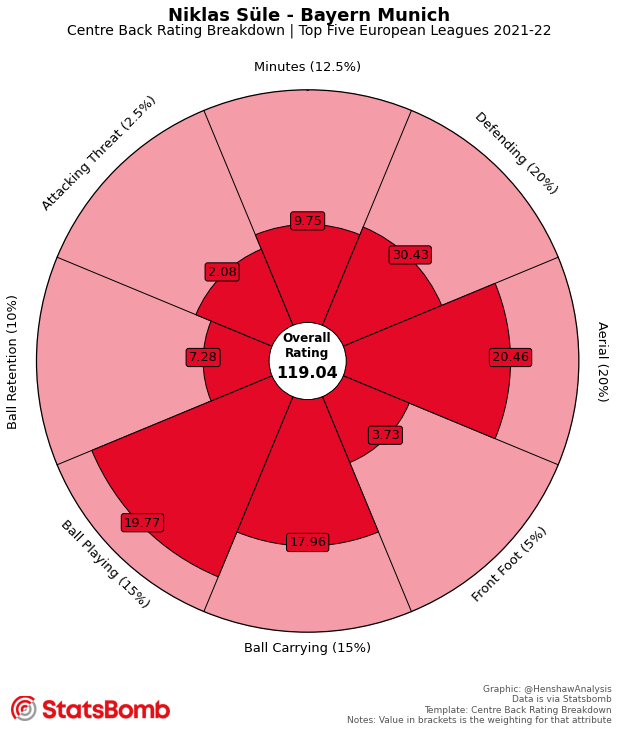

In [407]:
#Creating pizza chart

baker = PyPizza(
    params=params,
    background_color="white", straight_line_color="#000000",
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=16.5,
)


# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(10, 10),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        facecolor="#E40A27",edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=13,
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=13,
        bbox=dict(
            edgecolor="#000000", facecolor="#E40A27",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# Add Title / Edit Player Name and Club
fig.text(
    0.515, 0.975, "Niklas Süle - Bayern Munich", size=18, fontweight='bold',
    ha="center", color="#000000"
)

# Add Subtitle
fig.text(
    0.515, 0.956,
    "Centre Back Rating Breakdown | Top Five European Leagues 2021-22",
    size=14,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "Graphic: @HenshawAnalysis"
CREDIT_2 = "Data is via Statsbomb"
CREDIT_3 = "Template: Centre Back Rating Breakdown"
CREDIT_4 = "Notes: Value in brackets is the weighting for that attribute"

fig.text(
    0.935, 0.000, f"{CREDIT_1}\n{CREDIT_2}\n{CREDIT_3}\n{CREDIT_4}", size=9,
    color="#545454",
    ha="right"
)

fig.text (0.511, 0.509, "Overall\nRating", size=12, ha="center", fontweight='bold')
fig.text (0.511, 0.48, "119.04", size=16, ha="center", fontweight='bold')



# add image

im2 = imageio.imread('SB_LogoNew.png')
ax_image = add_image(
    im2, fig, left=0.1, bottom=-0.09, width=0.22, height=0.22
)   # these values might differ when you are plotting

plt.show()